# Auto-encoder with Conv2D

This notebook demonstrates using a Conv2D network in an autoencoding task with the MNIST dataset.

In [1]:
import conx as cx

Using TensorFlow backend.
ConX, version 3.7.5


First, we make a network. We will work with a 3 dimensional input from MNIST, but a flat target vector.

In [2]:
net = cx.Network("Auto-Encoding with Conv")
net.add(cx.Layer("input", (28,28,1)),
        cx.Conv2DLayer("Conv2D-1", 16, (5,5), colormap="gray", activation="relu"),
        cx.MaxPool2DLayer("maxpool1", (2,2)),
        cx.Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu"),
        cx.MaxPool2DLayer("maxpool2", (2,2)),
        cx.FlattenLayer("flatten"))
net.add(cx.Layer("output", 28 * 28, vshape=(28,28), activation='sigmoid'))
net.connect()

In [3]:
net.compile(error="mse", optimizer="adam")

We load the MNIST dataset and examine the shapes of the inputs and targets.

In [4]:
net.get_dataset("mnist")

In [5]:
net.dataset.info()

**Dataset**: MNIST


Original source: http://yann.lecun.com/exdb/mnist/

The MNIST dataset contains 70,000 images of handwritten digits (zero
to nine) that have been size-normalized and centered in a square grid
of pixels.  Each image is a 28 × 28 × 1 array of floating-point numbers
representing grayscale intensities ranging from 0 (black) to 1
(white).  The target data consists of one-hot binary vectors of size
10, corresponding to the digit classification categories zero through
nine.  Some example MNIST images are shown below:

![MNIST Images](https://github.com/Calysto/conx/raw/master/data/mnist_images.png)

**Information**:
   * name    : MNIST
   * length  : 70000

**Input Summary**:
   * shape  : (28, 28, 1)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (10,)
   * range  : (0.0, 1.0)



Because this is an auto-encoding task, we wish that the targets were the same as the inputs:

In [6]:
net.dataset.set_targets_from_inputs()

However, that gives a warning. ConX does not allow targets to have a shape, so we flatten them:

In [7]:
net.dataset.targets.reshape(28 * 28)

In [8]:
net.dataset.targets.shape

[(784,)]

In [9]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …

Just to test our design, we chop the majority of patterns, leaving only 100.

In [10]:
net.dataset.chop(69900)

And save 10% for testing/validation:

In [11]:
net.dataset.split(0.1)

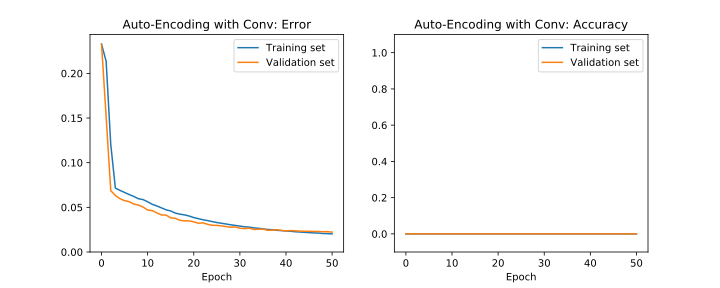

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#   50 |   0.02027 |   0.00000 |   0.02228 |   0.00000 


In [12]:
net.reset()
net.train(50)